### Scenario 3
#### Construction year 'Wind park 1' = Construction year 'Wind park 2' = Construction year 'Artificial Energy Island'
This notebook shows the basics of Scenario 3 as suggested by Wouter van den Haak:
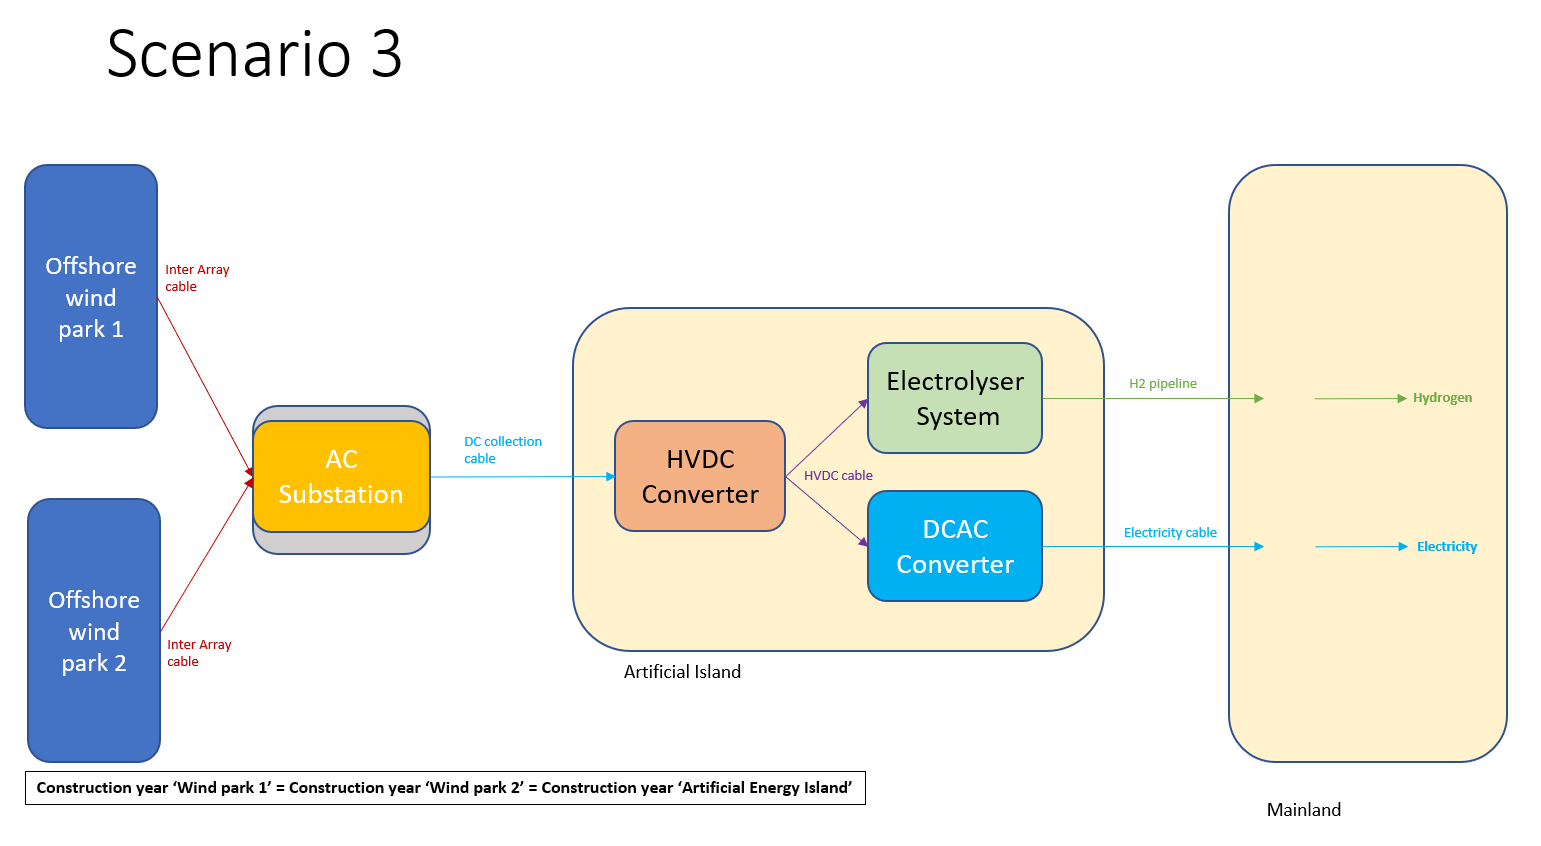

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *
import numpy as np

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
We are including the following elements:

##### 1.1.1 Foundations and cables

In [3]:
#Wind park 1
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

#Wind park 2
foundation2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation2_data['depreciation_rate']=1/foundation2_data['economic_lifetime']
display(foundation2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [4]:
#Wind park 1
Foundation = Object(**foundation_data)

#Wind park 2
Foundation2 = Object(**foundation2_data)

In [5]:
#Wind park 1
Foundation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

#Wind park 2
Foundation2.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.1.1 Turbines

In [6]:
#Wind park 1
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

#Wind park 2
turbine2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine2_data['depreciation_rate']=1/turbine2_data['economic_lifetime']
display(turbine2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [7]:
#Wind park 1
Turbine = Object(**turbine_data)

#Wind park 2
Turbine2 = Object(**turbine2_data)

In [8]:
#Wind park 1
Turbine.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

#Wind park 2
Turbine2.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.2.1 AC Substation

In [9]:
#AC Substation 1
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 239301.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [10]:
#AC Substation 1
ACStation = Object(**AC_substation_data)

In [11]:
#AC Substation 1
ACStation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.2.2 DC Collection Cable

In [12]:
#DC Collection Cable 1
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 470134.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [13]:
#DC Collection Cable 1
DCCollectionCable = Object(**DC_collection_cable_data)

In [14]:
#DC Collection Cable 1
DCCollectionCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.3.1 HVDC Converter

In [15]:
#HVDC Converter 1
HVDC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Converter')
HVDC_converter_data['depreciation_rate']=1/HVDC_converter_data['economic_lifetime']
display(HVDC_converter_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 472500.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [16]:
#HVDC Converter 1
HVDCConverter = Object(**HVDC_converter_data)

In [17]:
#HVDC Converter 1
HVDCConverter.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.3.2 HVDC Cable

In [18]:
#HVDC Cable 1
HVDC_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable_data['depreciation_rate']=1/HVDC_cable_data['economic_lifetime']
display(HVDC_cable_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 232500.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 130000.0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [19]:
#HVDC Cable 1
HVDCCable = Object(**HVDC_cable_data)

In [20]:
#HVDC Cable 1
HVDCCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.1 Electrolyser

In [21]:
#Electrolyser 1
Electrolyser_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Electrolyser')
Electrolyser_data['depreciation_rate']=1/Electrolyser_data['economic_lifetime']
display(Electrolyser_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Electrolyser',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 585000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [22]:
#Electrolyser 1
Electrolyser = Object(**Electrolyser_data)

In [23]:
#Electrolyser 1
Electrolyser.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.2 Desalination Unit

In [24]:
#Desalination Unit 1
Desalination_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Desalination unit')
Desalination_unit_data['depreciation_rate']=1/Desalination_unit_data['economic_lifetime']
display(Desalination_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Desalination unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 3900.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [25]:
#Desalination Unit 1
DesalinationUnit = Object(**Desalination_unit_data)

In [26]:
#Desalination Unit 1
DesalinationUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.3 Compressor Unit

In [27]:
#Compressor Unit 1
Compressor_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor unit')
Compressor_unit_data['depreciation_rate']=1/Compressor_unit_data['economic_lifetime']
display(Compressor_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 169000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [28]:
#Compressor Unit 1
CompressorUnit = Object(**Compressor_unit_data)

In [29]:
#Compressor Unit 1
CompressorUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.4 Storage Unit

In [30]:
#Storage Unit 1
Storage_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Storage unit')
Storage_unit_data['depreciation_rate']=1/Storage_unit_data['economic_lifetime']
display(Storage_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Storage unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 338000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [31]:
#Storage Unit 1
StorageUnit = Object(**Storage_unit_data)

In [32]:
#Storage Unit 1
StorageUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.5 Compressor after storage

In [33]:
#Compressor after storage 1
Compressor_after_storage_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor after storage')
Compressor_after_storage_data['depreciation_rate']=1/Compressor_after_storage_data['economic_lifetime']
display(Compressor_after_storage_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor after storage',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 11700.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [34]:
#Compressor after storage 1
CompressorAfterStorage = Object(**Compressor_after_storage_data)

In [35]:
#Compressor after storage 1
CompressorAfterStorage.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.5 DCAC Converter

In [36]:
#DCAC Converter 1
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 37077.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

In [37]:
#DCAC Converter 1
DCACConverter = Object(**DCAC_converter_data)

In [38]:
#DCAC Converter 1
DCACConverter.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.6 Artificial Island

In [39]:
Artificial_island_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Artificial island')
Artificial_island_data['depreciation_rate']=1/Artificial_island_data['economic_lifetime']
display(Artificial_island_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Artificial island',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 14300.0,
 'capex_per_unit_units': 'EUR / m2',
 'unit': 300000.0,
 'unit_units': 'm2',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [40]:
ArtificialIsland = Object(**Artificial_island_data)

In [41]:
ArtificialIsland.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.7.1 H2 Pipeline

In [42]:
H2_pipeline_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Transport',
                               component='H2 Pipeline')
H2_pipeline_data['depreciation_rate']=1/H2_pipeline_data['economic_lifetime']
display(H2_pipeline_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Transport',
 'component': 'H2 Pipeline',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 9500.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 130000.0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': []}

In [43]:
H2Pipeline = Object(**H2_pipeline_data)

In [44]:
H2Pipeline.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.7.2 Electricity cable

In [45]:
electricity_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Transport',
                               component='Electricity cable')
electricity_cable_data['depreciation_rate']=1/electricity_cable_data['economic_lifetime']
display(electricity_cable_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Transport',
 'component': 'Electricity cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 96750.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 2000.0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': []}

In [46]:
ElectricityCable = Object(**electricity_cable_data)

In [47]:
ElectricityCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 2. Generate combined cashflows

In [48]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, H2Pipeline.df, ElectricityCable.df])

##### 3. Calculate NPVs

In [49]:
df_combined_npv=calculate_npv(df_combined, 2023, WACC=0.0984)

##### 4. Plots

##### 4.1. NPV Plot

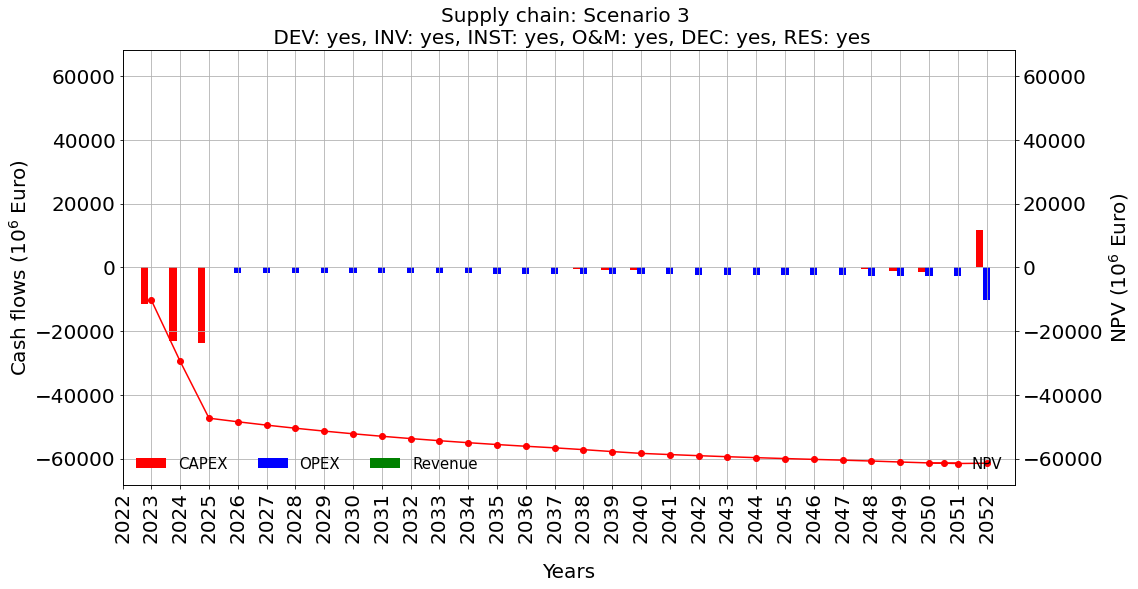

In [50]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Scenario 3 \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 4.2. Pie chart

In [51]:
# collect the npv calculations per item (without revenues)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
Foundation2.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)

Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
Turbine2.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)

ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)

HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, 2023, WACC=0.0984)
HVDCCable.df_npv = calculate_npv(HVDCCable.df, 2023, WACC=0.0984)

Electrolyser.df_npv = calculate_npv(Electrolyser.df, 2023, WACC=0.0984)
DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, 2023, WACC=0.0984)
CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, 2023, WACC=0.0984)
StorageUnit.df_npv = calculate_npv(StorageUnit.df, 2023, WACC=0.0984)
CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, 2023, WACC=0.0984)

DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)

ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, 2023, WACC=0.0984)

H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, 2023, WACC=0.0984)
ElectricityCable.df_npv = calculate_npv(ElectricityCable.df, 2023, WACC=0.0984)

In [52]:
# prepare input for pie chart

# combine the values of certain items
foundation_cables_value = -Foundation.df_npv.cashflow_sum.iloc[-1] - Foundation2.df_npv.cashflow_sum.iloc[-1]
turbine_value = -Turbine.df_npv.cashflow_sum.iloc[-1] - Turbine2.df_npv.cashflow_sum.iloc[-1]
AC_substation_value = -ACStation.df_npv.cashflow_sum.iloc[-1] - DCCollectionCable.df_npv.cashflow_sum.iloc[-1]
hvdc_converter_value = -HVDCConverter.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1]
electrolysis_value = -Electrolyser.df_npv.cashflow_sum.iloc[-1] -DesalinationUnit.df_npv.cashflow_sum.iloc[-1] -CompressorUnit.df_npv.cashflow_sum.iloc[-1] -StorageUnit.df_npv.cashflow_sum.iloc[-1] -CompressorAfterStorage.df_npv.cashflow_sum.iloc[-1]
dcac_converter_value = -DCACConverter.df_npv.cashflow_sum.iloc[-1] 
artificial_island_value = -ArtificialIsland.df_npv.cashflow_sum.iloc[-1]
H2_pipeline_value = -H2Pipeline.df_npv.cashflow_sum.iloc[-1]
electricity_cable_value = -ElectricityCable.df_npv.cashflow_sum.iloc[-1]

# create a new data point for each combined value
labels = ['Foundation & cables', 'Turbine', 'AC Substation', 'HVDC Converter', 'Electrolysis', 'DCAC Converter', 'Artificial Island', 'H2 Pipeline', 'Electricity Cable']
data = [foundation_cables_value, turbine_value, AC_substation_value, hvdc_converter_value, electrolysis_value, dcac_converter_value, artificial_island_value, H2_pipeline_value, electricity_cable_value
]


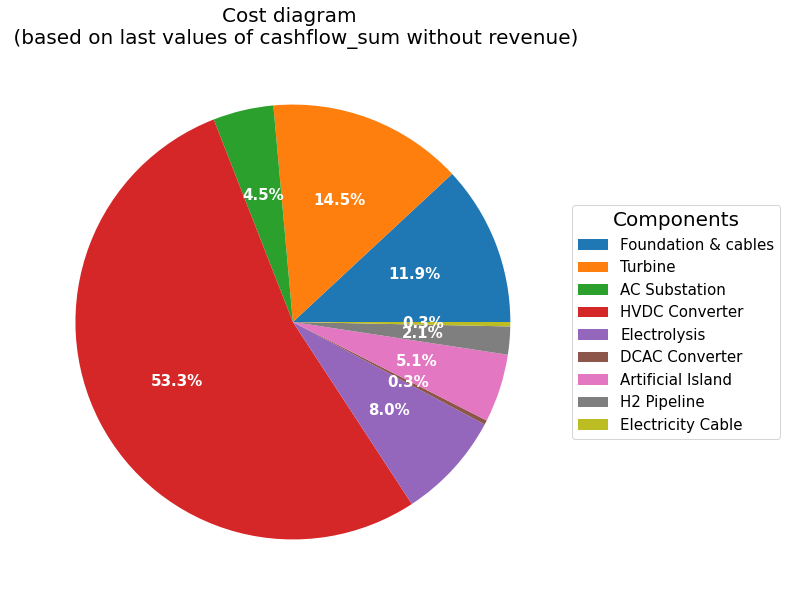

In [53]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram \n (based on last values of cashflow_sum without revenue)", fontsize=20)

plt.show()

##### 5. LCOE & LCOH

In [54]:
total_wind_energy_production_per_year = (turbine_data['unit'] + turbine2_data['unit']) * 1000 * 4380  # parkcapacity * operational hours 
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_DC_collection_cable_loss))

energy_after_HVDC_cable_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_HVDC_cable_loss: {:.0f} kWh'.format(energy_after_HVDC_cable_loss))

kWh_to_tons = 50000 #kWH/tons hydrogen

dedicated_electrolyser_energy = 0.5

dedicated_DCAC_energy = (1 - dedicated_electrolyser_energy)

energy_after_electrolysis = ((energy_after_HVDC_cable_loss * dedicated_electrolyser_energy) / kWh_to_tons) * 1000
print('energy_after_electrolysis: {:.0f} kg hydrogen per year'.format(energy_after_electrolysis))

energy_after_DCAC_converter = (energy_after_HVDC_cable_loss * dedicated_DCAC_energy)
print('energy_after_DCAC_converter: {:.0f} kWh per year'.format(energy_after_DCAC_converter))

hydrogen_onshore = energy_after_electrolysis * 0.9
print('Transported hydrogen onshore: {:.0f} kg hydrogen per year'.format(hydrogen_onshore))

electricity_onshore = energy_after_DCAC_converter * 0.9
print('Transported electricity onshore: {:.0f} kWh per year'.format(electricity_onshore))

total_wind_energy_production_per_year: 26280000000 kWh
energy_after_inter_array_cable_loss (20 km): 26017200000 kWh
energy_after_DC_collection_cable_loss (20 km): 25496856000 kWh
energy_after_HVDC_cable_loss: 24986918880 kWh
energy_after_electrolysis: 249869189 kg hydrogen per year
energy_after_DCAC_converter: 12493459440 kWh per year
Transported hydrogen onshore: 224882270 kg hydrogen per year
Transported electricity onshore: 11244113496 kWh per year


In [55]:
operational_years = 27

total_electricity = electricity_onshore * operational_years # kWh
total_hydrogen = hydrogen_onshore * operational_years #kg
total_cost = sum(data)            # EU

In [56]:
LCOE = total_cost / total_electricity
LCOH = total_cost / total_hydrogen

print('LCOE: {:.2f} EU/kWh'.format(LCOE))
print('LCOH: {:.2f} EU/kg'.format(LCOH))

LCOE: 0.39 EU/kWh
LCOH: 19.34 EU/kg


In [57]:
# ToDo: also calculate efficiency (part of the originally produced energy that reaches the shore)
SupplyChain_efficiency = electricity_onshore / total_wind_energy_production_per_year
print('SupplyChain efficiency: {} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 42.78582 %


##### 6 - Revenues

In [58]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, H2Pipeline.df, ElectricityCable.df])

In [59]:
#annual
print('Transported hydrogen onshore: {:.0f} kg hydrogen per year'.format(hydrogen_onshore))
print('Transported electricity onshore: {:.0f} kWh per year'.format(electricity_onshore))

#total
print('Total electricty production: {:.0f} kWh'.format(total_electricity))
print('Total hydrogen production: {:.0f} kg'.format(total_hydrogen))

Transported hydrogen onshore: 224882270 kg hydrogen per year
Transported electricity onshore: 11244113496 kWh per year
Total electricty production: 303591064392 kWh
Total hydrogen production: 6071821288 kg


In [60]:
# create escalation list
escalation_base_year=2023   # dit moeten we misschien aan het begin van het notebook opgeven
lifecycle=29                # dit moeten we misschien aan het begin van het notebook opgeven
escalation_rate=0.02        # dit moeten we misschien aan het begin van het notebook opgeven

escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [61]:
# escalate revenue values
construction_duration = 3  # nu zet hij automatisch de eerste drie jaren op nul?
revenue_years = list(range(escalation_base_year + construction_duration, escalation_base_year + lifecycle + 1))

#energy prices
electricity_price = 0.15  # LCOE: 0.12 EU/kWh (see below) ... take 3 ct profit?
hydrogen_price = 15 # 15 EU / kg

electricity_revenue_value = energy_after_DCAC_converter * electricity_price
hydrogen_revenue_value = energy_after_electrolysis * hydrogen_price

revenue_value = electricity_revenue_value + hydrogen_revenue_value

In [62]:
revenue_values=[]
for i, revenue_year in enumerate(revenue_years):
    revenue_values.append(revenue_value * escalation_values[
        [index for index, escalation_year in enumerate(escalation_years) if escalation_year == revenue_year][0]])

In [63]:
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [64]:
df_combined_npv = calculate_npv(df_combined, 2023, WACC=0.0984)

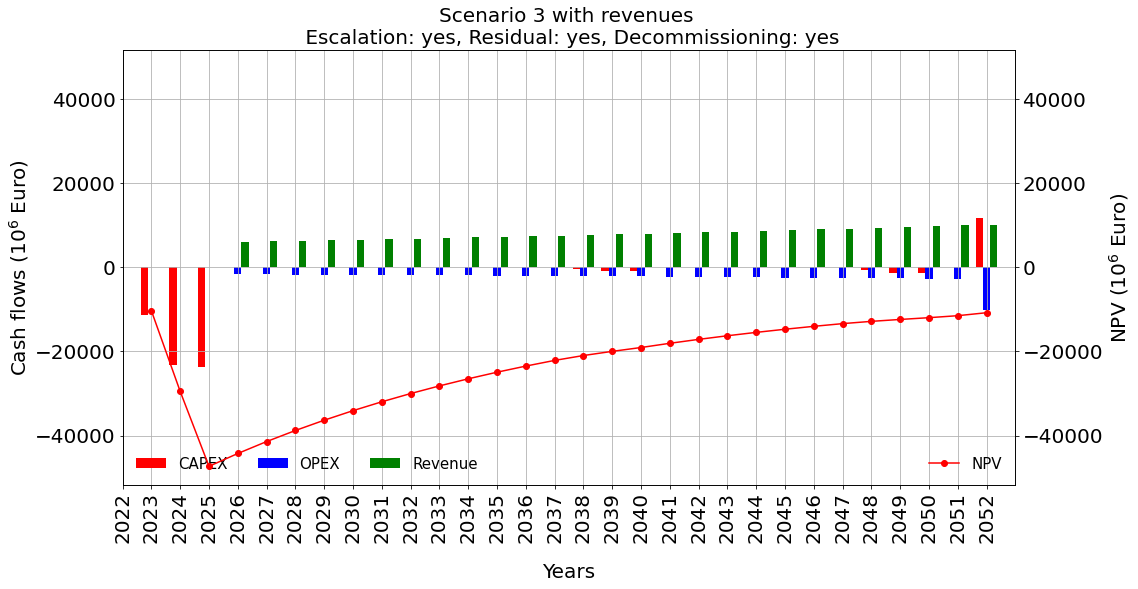

In [65]:
create_npv_plot(df_combined_npv, title='Scenario 3 with revenues \n Escalation: yes, Residual: yes, Decommissioning: yes' )